# 10. Tree-based methods

## author: Anastasios Giovanidis 2019-2020

Links:

Python Tree Regression: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Python Tree Classification: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Python Random Forest Regression: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Python Random Forest Classification: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Python Random Forest Example: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
import warnings
#
import matplotlib.pyplot as plt
import numpy as np
#
warnings.filterwarnings('ignore')

/Users/Fishbone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Regressor Example 1

Taken from https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

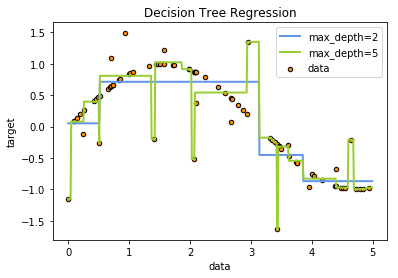

In [2]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Exercise 1 (Tree Regression)

Using the "boston" database, we would like to perform a regression from input features to output target. 

(a) First use just one of its features, i.e. the mean distance to business centers 'DIS' (the 7th feature counting from 0). Playing with a single regression tree, we want to find the MSE of prediction, depending on the tree depth. To do so, we can either split the input data into a train and test pair ourselves, with $n_{train} = ceil(\frac{4 n_{sample}}{5})$, or we can use the cross validation routine with $cv=10$ splits.

Compare the result with the NN-regression and various numbers of Nearest Neighoubours.

(b) Furthermore, use all 13 features of the database, to extract a decision tree with various depths. 

**Visualize the trees using Graphviz** How can you read the data?

- Numerical values for tree-depth: **max_depth=1, 2, 3, 5, 10, None**. The default value is "None". What is the tree-depth that gives the lowest Test error?

- Numerical values for sample-split: **min_samples_split=2, 4, 6, 8**. The default value is 2. What is the tree-depth that gives the lowest Test error?

- Numerical values for NN neighbours: **n_neighbors=1, 50, 100, 150, 200**. What is the parameter with the lowest Test error? compare with the tree-based method.


**Answer (a):**

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
feat = 7
# one feature
X = boston.data[:,feat]
print(np.shape(X))
y = boston.target
#
n_sample = len(boston.data[:,feat])

(506,)


In [5]:
# Split the input data into a Train and a Test set
n_train = int(np.ceil(4*len(boston.data[:,6])/5))
np.random.seed(400)
i_train = np.random.choice(n_sample,n_train,replace=False)
i_test = np.setdiff1d(np.arange(n_sample), i_train)
# Single feature
X_train = X[i_train].reshape(-1, 1)
# Single feature
X_test = X[i_test].reshape(-1, 1)
#
y_train = y[i_train] 
y_test = y[i_test]

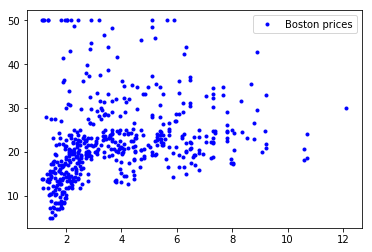

In [6]:
# for 1 feature
plt.plot(X, y, ".b", label="Boston prices")
plt.legend()

In [7]:
reg_t = DecisionTreeRegressor(max_depth=3,random_state=0) #max_depth=1,2,3,None

In [8]:
reg_t.fit(X_train, y_train)
y_predict = reg_t.predict(X_test)

We can have a first description of the tree by looking at specific information: children on left, or right, decision thresholds, among others.

In [9]:
print(reg_t.tree_.children_left) #array of left children
print(reg_t.tree_.children_right) #array of right children
#print(reg_t.tree_.feature) #array of nodes splitting feature
print(reg_t.tree_.threshold) #array of nodes splitting points
#print(reg_t.tree_.value) #array of nodes values

[ 1  2  3 -1 -1  6 -1 -1  9 10 -1 -1 13 -1 -1]
[ 8  5  4 -1 -1  7 -1 -1 12 11 -1 -1 14 -1 -1]
[ 2.58835006  1.8759501   1.33870006 -2.         -2.          1.8951
 -2.         -2.          3.65845013  2.82634997 -2.         -2.
  4.55354977 -2.         -2.        ]


In [10]:
#print(reg_t.apply(X_train)) #Returns the index of the leaf that each sample is predicted as.

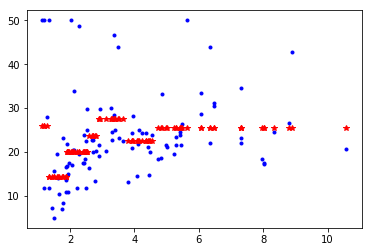

In [11]:
plt.plot(X_test, y_test, ".b", label="Boston prices")
plt.plot(X_test, y_predict, "r*", label=r"$\^y(x)$")

Visualisation of the Tree.

In [12]:
# install graphviz
# conda install -c anaconda graphviz 
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(reg_t, out_file="mytree1D.dot",rounded = True, proportion = False, 
                precision = 2, filled = True)#,feature_names = boston.feature_names)

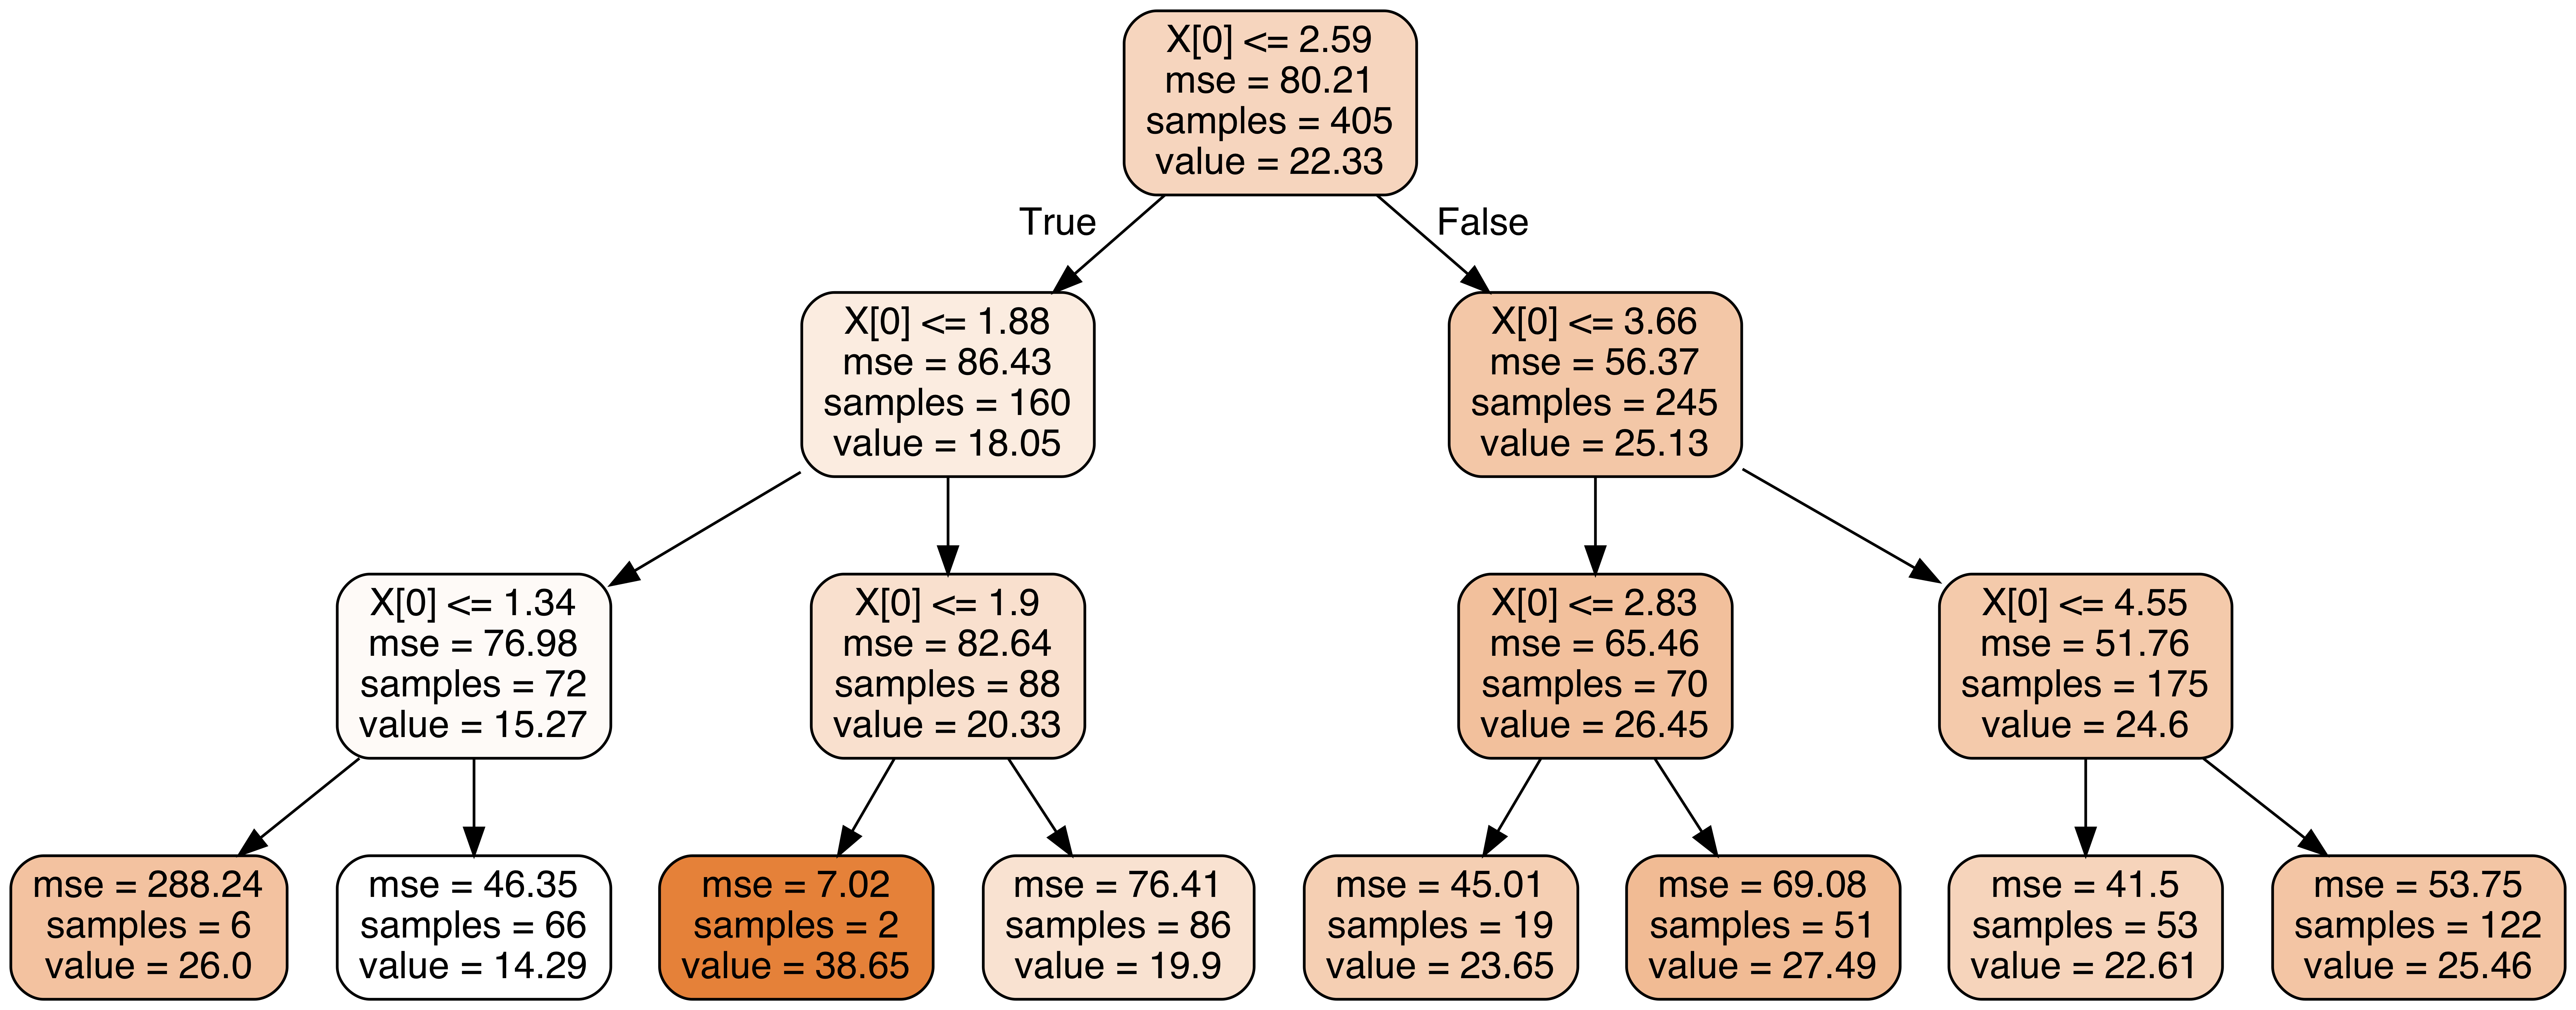

In [13]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'mytree1D.dot', '-o', 'mytree1D.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'mytree1D.png')

Comparison with NN regression

In [13]:
# NN-regression
#TODO

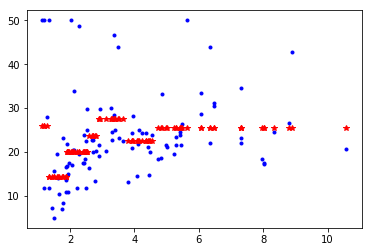

In [14]:
plt.plot(X_test, y_test, ".b", label="Boston prices")
plt.plot(X_test, y_predict, "r*", label=r"$\^y(x)$")
#plt.plot(X_test, y_nnpredict, "yo", label=r"$\^y(x)o$")

Comparison of the regression methods with cross-validation.

In [15]:
from sklearn.metrics import SCORERS
#sorted(SCORERS.keys())

In [16]:
list_d1 = (1,3,5,10,15)
for max_d in list_d1:
    reg_tCV = DecisionTreeRegressor(max_depth=max_d,random_state=0)
    # if X is 1-dimensional
    X = X.reshape(-1,1)
    reg_tCV.fit(X, y)
    print("score(max_depth = %.0f)= %.3f" % (max_d, -cross_val_score(reg_tCV, X, y, scoring='neg_mean_squared_error', cv=10).mean()))

score(max_depth = 1)= 91.496
score(max_depth = 3)= 97.335
score(max_depth = 5)= 105.859
score(max_depth = 10)= 131.174
score(max_depth = 15)= 150.768


In [17]:
list_d2 = (2,4,6,8)
# Find here the score for min_samples_split

In [18]:
list_d3 = (1, 50, 100, 150, 200)
# Find here the score for KNN

**Answer (b)**

Now we use all features for the regression tree

In [19]:
X = boston.data
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Exercise 2 (Tree Classification)

Using the "iris" dataset, classify the plants based on their type (from '0' to '2'). Give a decision tree, and vary its depth. Evaluate the optimal depth, using cross validation.

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
#print(iris.DESCR)

In [21]:
clf = DecisionTreeClassifier(max_depth = None)

## Exercise 3 (Random Forest)

Use the following code to familiarize with the notions of Bagging and Random Forest. At each split, Random Forest uses only a subset of the feature set, the number of which is e.g. $\log{F}$ or $\sqrt{F}$, where $F$ is just the feature number. When all features are used, then we just have Bagging, i.e. many trees formed by bootstrapping the input data, and the classification result comes from a majority rule over all the tries. The method uses also the Out-Of-Bag validation method, to derive the score of the classifier using the trees that do not include the evaluated sample.

Automatically created module for IPython interactive environment


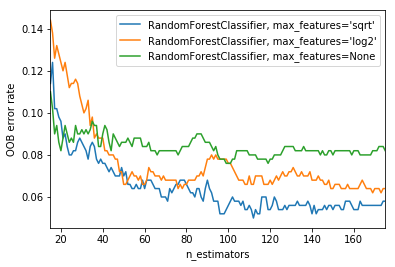

In [22]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

RANDOM_STATE = 123

# case 1: syntehtic dataset
# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

# case 2: load new dataset
#from sklearn.datasets import load_breast_cancer
#breast = load_breast_cancer()
#

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

### END